<a href="https://colab.research.google.com/github/bdfd/Section6.Project01-Car-Price-Predictor/blob/main/Car_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Predictor

## Exploratory Data Analysis

The Background Introduction  
Determine the Relationship Between Car Feature and Price

The Approach  
1. Perform some quick EDA(Exploratory Data Analysis)
2. Feature Engineering
3. Data Cleaning
4. Encoding, Scaling and Preprocessing
5. Traning Machine Learning Models
5. Cross Validation and Ensembling Predictions

Prediction Used Model:
  *   1. Linear Regression

Analyze information  
1 non-binary categorical features: company  
2 continuous features: year, kms_driven  
1 constant feature: fuel_type  
1 possible drop feature: name  
1 target variable: Price  

In [ ]:
# import from google colab
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/3.0 Colab Project/1.0 Colab Playground
!pip install -r requirements.txt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/3.0 Colab Project/1.0 Colab Playground


In [ ]:
#Code to verify the package installation
try:
  import gspread
  print('package is installed.')
except:
  print('Package not found')

package is installed.


In [ ]:
# Configuration Setting
# from google.colab import data_table
# data_table.enable_dataframe_formatter()

In [ ]:
# Import necessary packages
import warnings
warnings.filterwarnings('ignore')
import execdata as exe
import pickle
from tqdm import tqdm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline
sns.set(style='darkgrid', font_scale=1.4)

#Scikit-Learn Fundamental Packages
import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, r2_score
# from sklearn.metrics import roc_auc_score,roc_curve, plot_roc_curve
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
root_dir = '/content/drive/MyDrive'
work_dir = '/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/Project01-Car Price Predictor'
data_path =f'{work_dir}/data'
result_dir = f'{work_dir}/result'

In [ ]:
import os
if not os.path.exists(data_path):
  os.mkdir(data_path)

In [ ]:
import os
if not os.path.exists(result_dir):
  os.mkdir(result_dir)

In [ ]:
%cd '{result_dir}'
!pwd

/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/Project01-Car Price Predictor/result
/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/Project01-Car Price Predictor/result


In [ ]:
# Alternative of Reading the dataset
# pwd = os.getcwd()
# data_dir = os.path.join(pwd, '50_Startups.csv')
# df = pd.read_csv(data_dir, encoding = 'utf-8')
# Read the dataset - switch to second link if first one not work, OP mean On Progressing
# data_dir = 'https://raw.githubusercontent.com/bdfd/Portfolio_Project_14OP-Campus_Placement_Prediction/main/dataset'
dataset_url_1 = 'Car_Preprocessed_Data.csv'
df = pd.read_csv(os.path.join(result_dir,dataset_url_1), encoding = 'utf-8')
# df2 = pd.read_csv(os.path.join(data_path,dataset_url_2), encoding = 'utf-8')
df.head(3)

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol


In [ ]:
print(f'the dataset_1 size is {df.shape}')

the dataset_1 size is (816, 7)


In [ ]:
# Check column name and categories
df.columns.values

array(['Unnamed: 0', 'name', 'company', 'year', 'Price', 'kms_driven',
       'fuel_type'], dtype=object)

In [ ]:
# Renaming the column 'A' to 'New_A'
df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

In [ ]:
df
df.set_index('Index',inplace=True)

In [ ]:
df['Price']

Index
0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
811    270000
812    110000
813    300000
814    260000
815    390000
Name: Price, Length: 816, dtype: int64

In [ ]:
# Find any missing or null value
df['Price'].info()
df['Price'].isna().sum()

<class 'pandas.core.series.Series'>
Int64Index: 816 entries, 0 to 815
Series name: Price
Non-Null Count  Dtype
--------------  -----
816 non-null    int64
dtypes: int64(1)
memory usage: 12.8 KB


0

In [ ]:
import table_nan_val as tnv

Your selected dataframe has 6 columns.
There are 0 columns that have missing values.


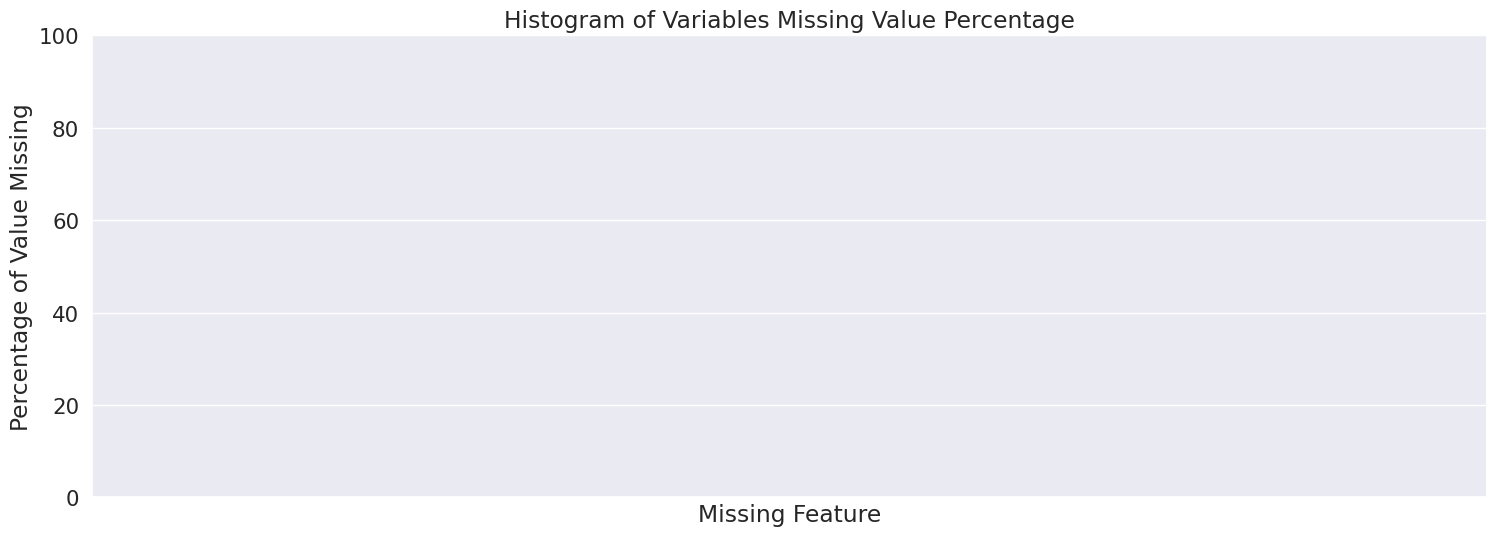

,index,Miss_Values,Miss_Rate,Available_Value


In [ ]:
tnv.Missing_Value_Analysis(df)

## Data Cleansing

In [ ]:
# Limit price range between 30000 and 30000000
high_limit = 3000000
low_limit = 30000

df = df[(df['Price']<high_limit) & (df['Price']>low_limit)]
df.shape

(812, 6)

In [ ]:
print(f'Duplicates in this dataset frame: {df.iloc[:,1:].duplicated().sum()}, ({np.round(100*df.iloc[:,1:].duplicated().sum()/len(df),1)}%)')
print('')

Duplicates in this dataset frame: 100, (12.3%)



250000    16
350000    12
130000    11
400000    11
90000     10
          ..
799999     1
644999     1
520000     1
72500      1
500001     1
Name: Price, Length: 269, dtype: int64


<Axes: xlabel='Price', ylabel='Density'>

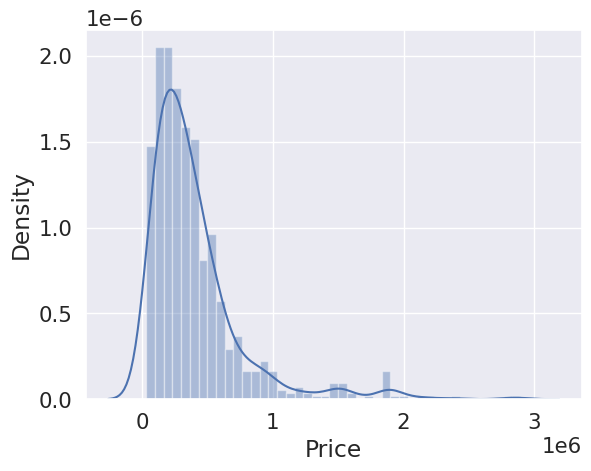

In [ ]:
print(df['Price'].value_counts())
sns.distplot(df['Price'])

In [ ]:
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

### Checking Relationship of Company vs Price

<Axes: >

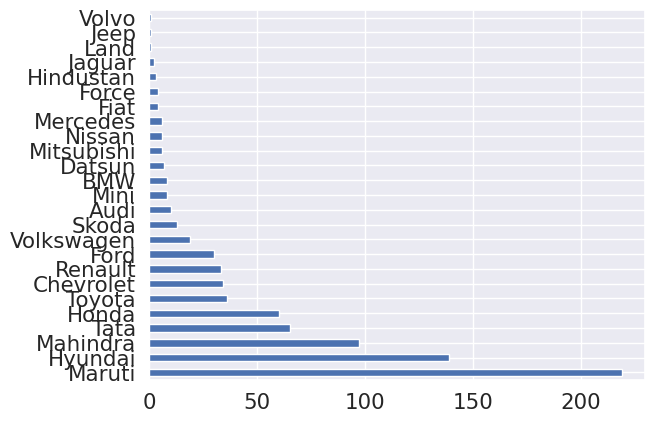

In [ ]:
df['company'].value_counts().plot(kind='barh')

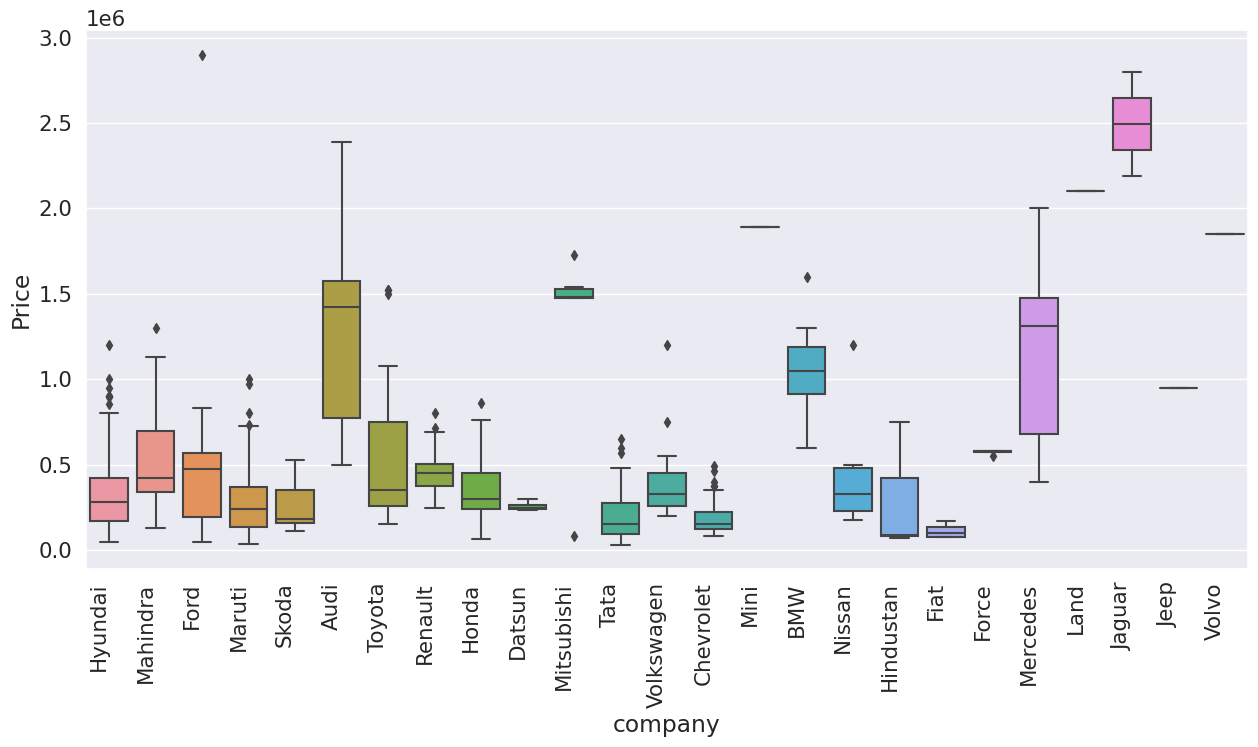

In [ ]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha='right')
plt.show()

In [ ]:
number = 10
column = 'company'
filtered_company_list = exe.filtered_value_list(df,column,number)
filtered_company_count = exe.filtered_value_count(df,column,number)

In [ ]:
filtered_company_list

['Mini',
 'BMW',
 'Datsun',
 'Mitsubishi',
 'Nissan',
 'Mercedes',
 'Fiat',
 'Force',
 'Hindustan',
 'Jaguar',
 'Land',
 'Jeep',
 'Volvo']

In [ ]:
filtered_company_count

Mini          8
BMW           8
Datsun        7
Mitsubishi    6
Nissan        6
Mercedes      6
Fiat          4
Force         4
Hindustan     3
Jaguar        2
Land          1
Jeep          1
Volvo         1
Name: company, dtype: int64

In [ ]:
# Filter rows where 'company' is not in 'filtered_value_list'
# after limit the car with number less than, only 755 rows left over in the dataframe
df = df[~df['company'].isin(filtered_company_list)]
df.shape

(755, 6)

In [ ]:
df.reset_index(inplace=True)
# reset index column and deleting the first column(Original Index Column)
df = df.iloc[:, 1:]
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
750,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
751,Tata Indica V2,Tata,2009,110000,30000,Diesel
752,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
753,Tata Zest XM,Tata,2018,260000,27000,Diesel


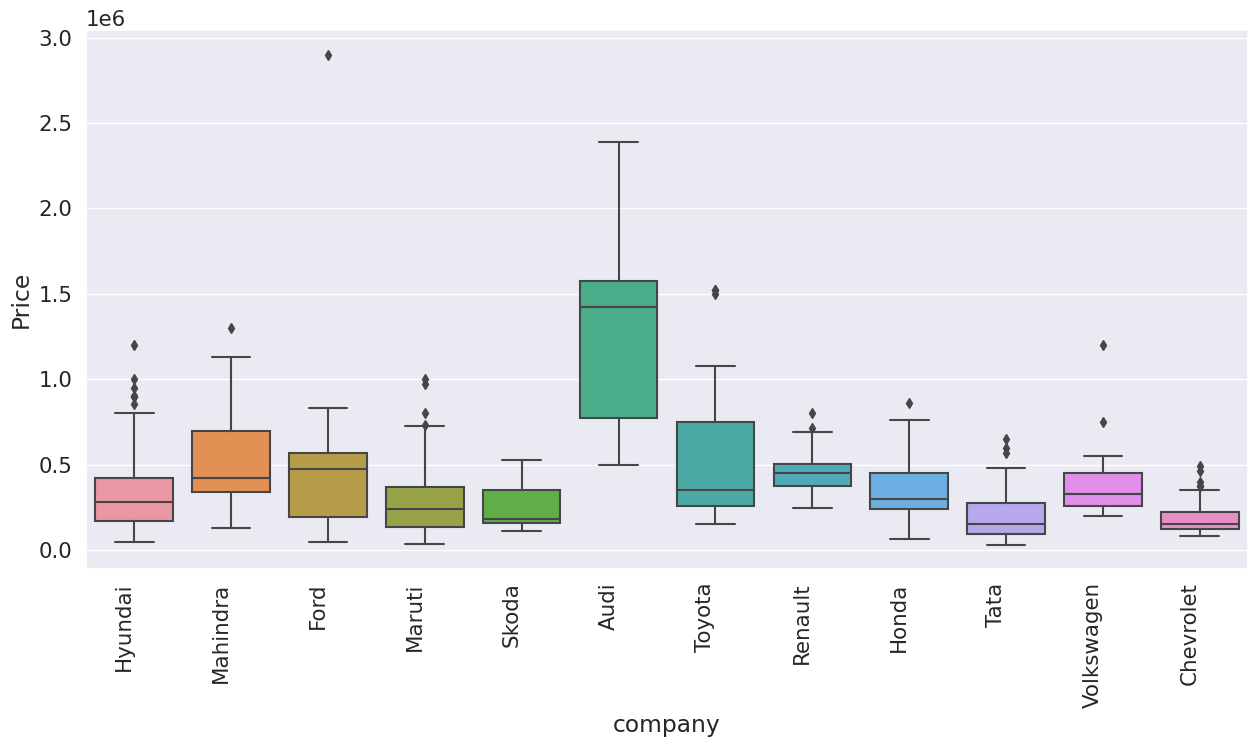

In [ ]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha='right')
plt.show()

In [ ]:
# Limit price range between low and high limit
high_limit = 2500000
low_limit = 30000

df = df[(df['Price']<high_limit) & (df['Price']>low_limit)]
df.shape

(754, 6)

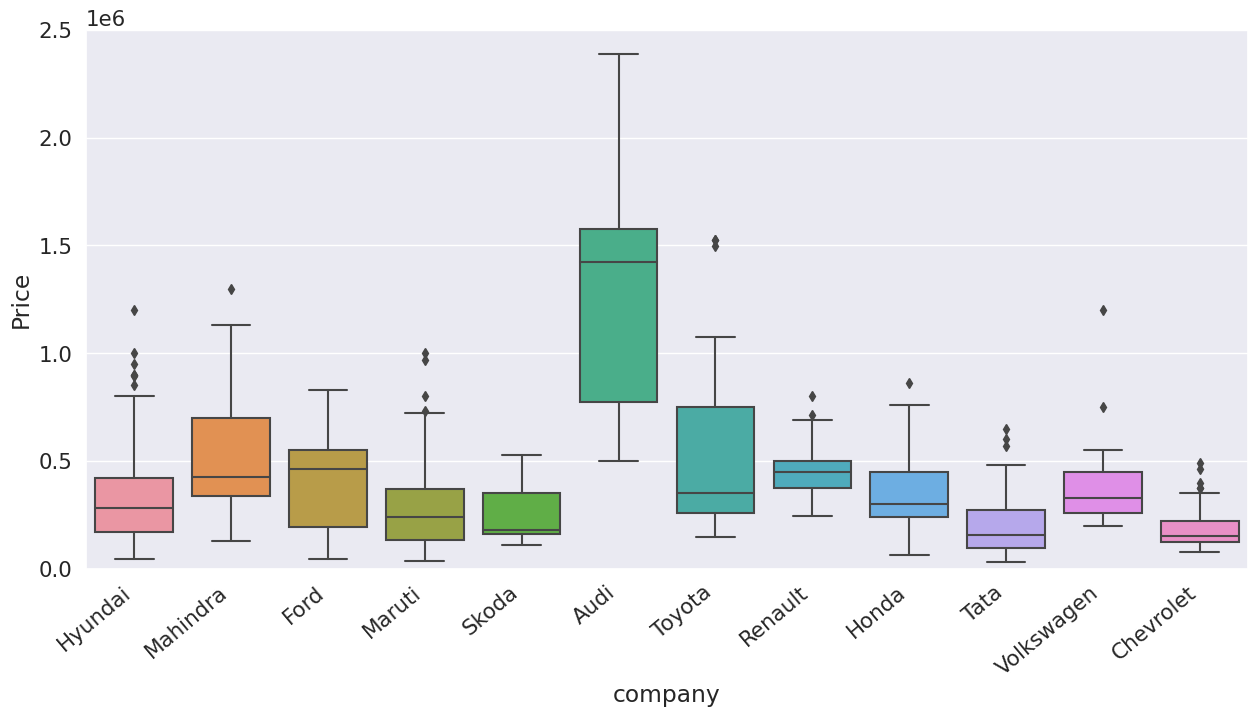

In [ ]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=df)
ax.set(ylim=(0, 2500000))
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

In [ ]:
df.reset_index(inplace=True)
# reset index column and deleting the first column(Original Index Column)
df = df.iloc[:, 1:]
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
749,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
750,Tata Indica V2,Tata,2009,110000,30000,Diesel
751,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
752,Tata Zest XM,Tata,2018,260000,27000,Diesel


### Checking the Relationship of Year vs Price

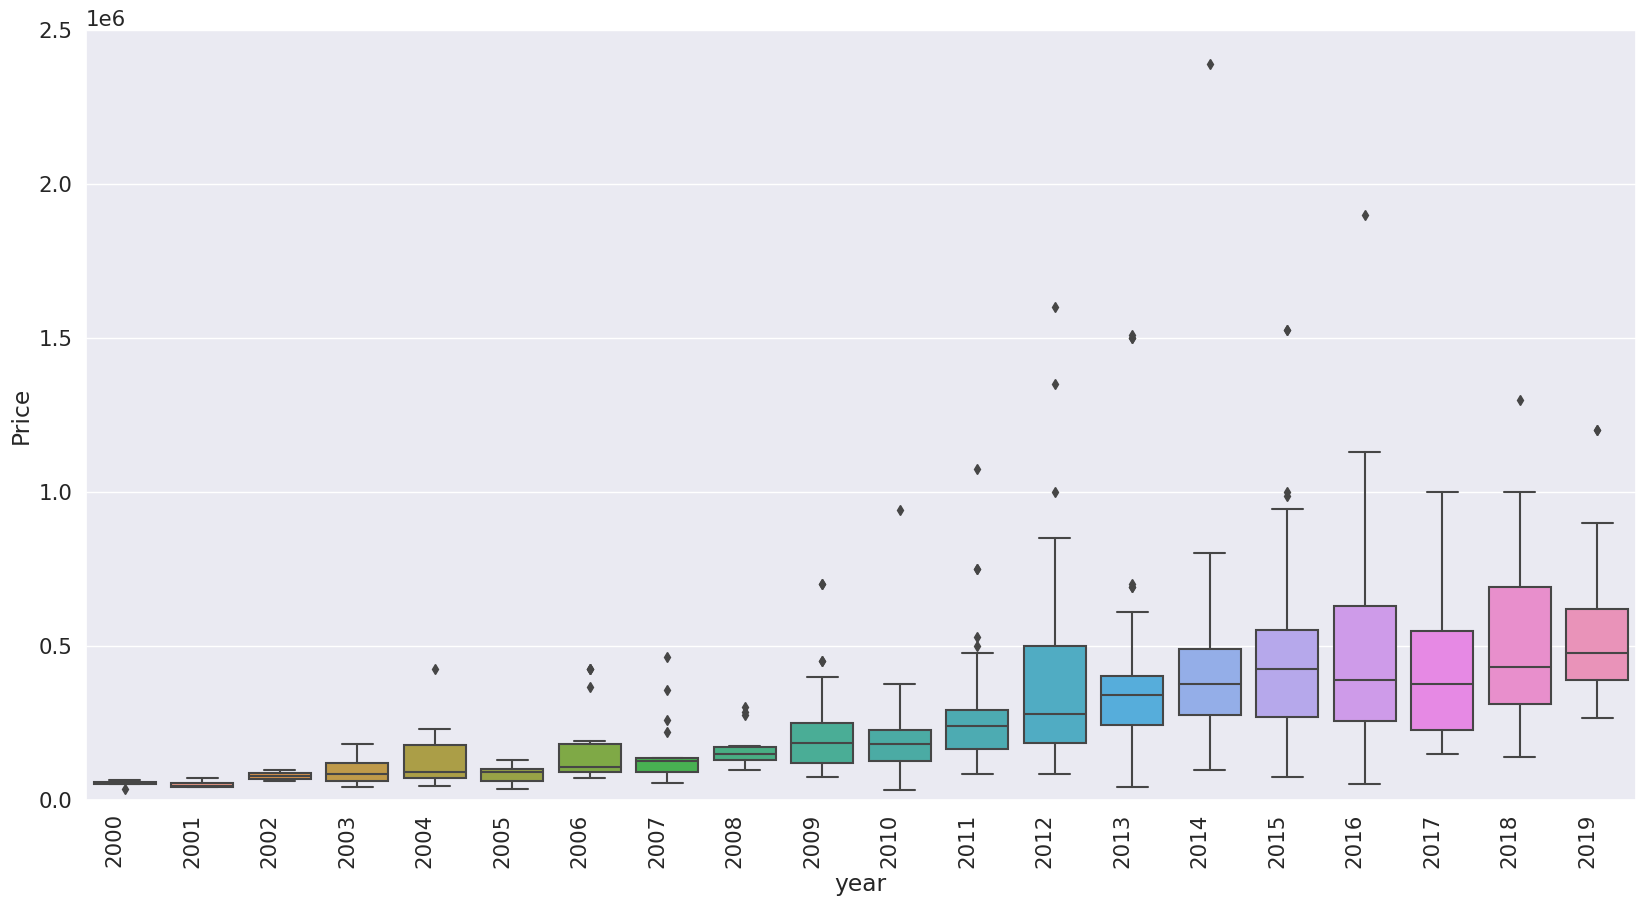

In [ ]:
plt.subplots(figsize=(20,10))
ax=sns.boxplot(x='year',y='Price',data=df)
ax.set(ylim=(0,2500000))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha='right')
plt.show()

In [ ]:
df['year'].value_counts()
number = 10
column = 'year'
filtered_year_list = exe.filtered_value_list(df,column,number)
filtered_year_count = exe.filtered_value_count(df,column,number)

In [ ]:
# Filter rows where 'year' is not in 'filtered_year_list'
# after limit the car with number less than 10 , only 742 rows left over in the dataframe
df = df[~df['year'].isin(filtered_year_list)]
df.shape

(742, 6)

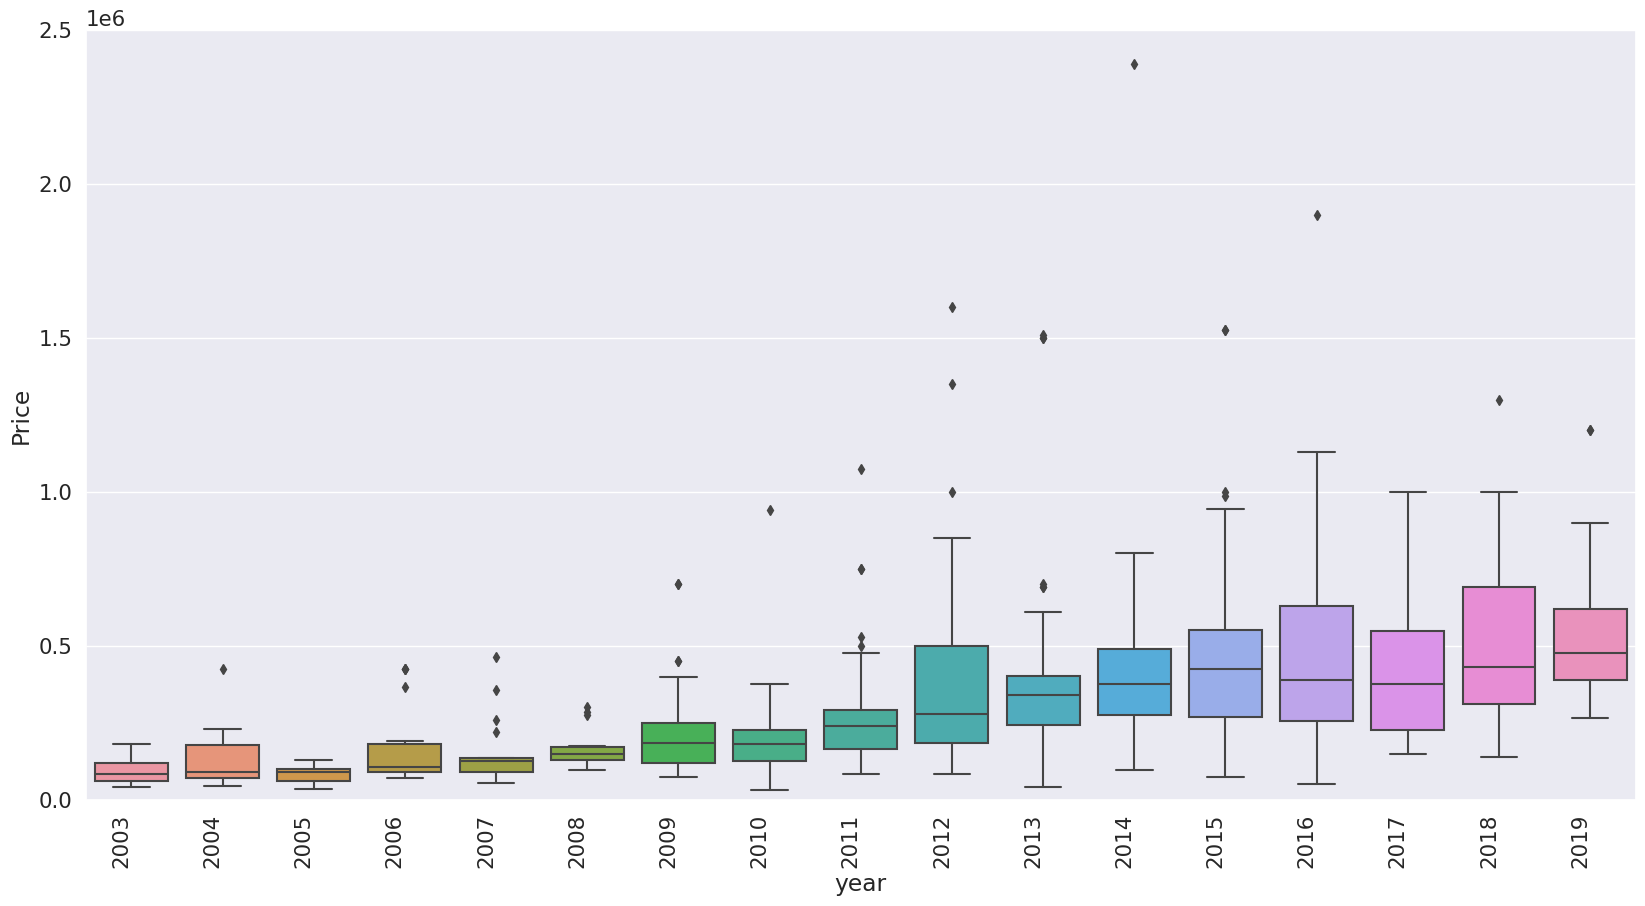

In [ ]:
plt.subplots(figsize=(20,10))
ax=sns.boxplot(x='year',y='Price',data=df)
ax.set(ylim=(0,2500000))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha='right')
plt.show()

In [ ]:
high_limit = 2000000
df[df['Price']>high_limit]

,name,company,year,Price,kms_driven,fuel_type
581,Audi Q5 2.0,Audi,2014,2390000,34000,Diesel


In [ ]:
# Limit price range between low and high limit
high_limit = 2000000
low_limit = 30000

df = df[(df['Price']<high_limit) & (df['Price']>low_limit)]
df.shape

(741, 6)

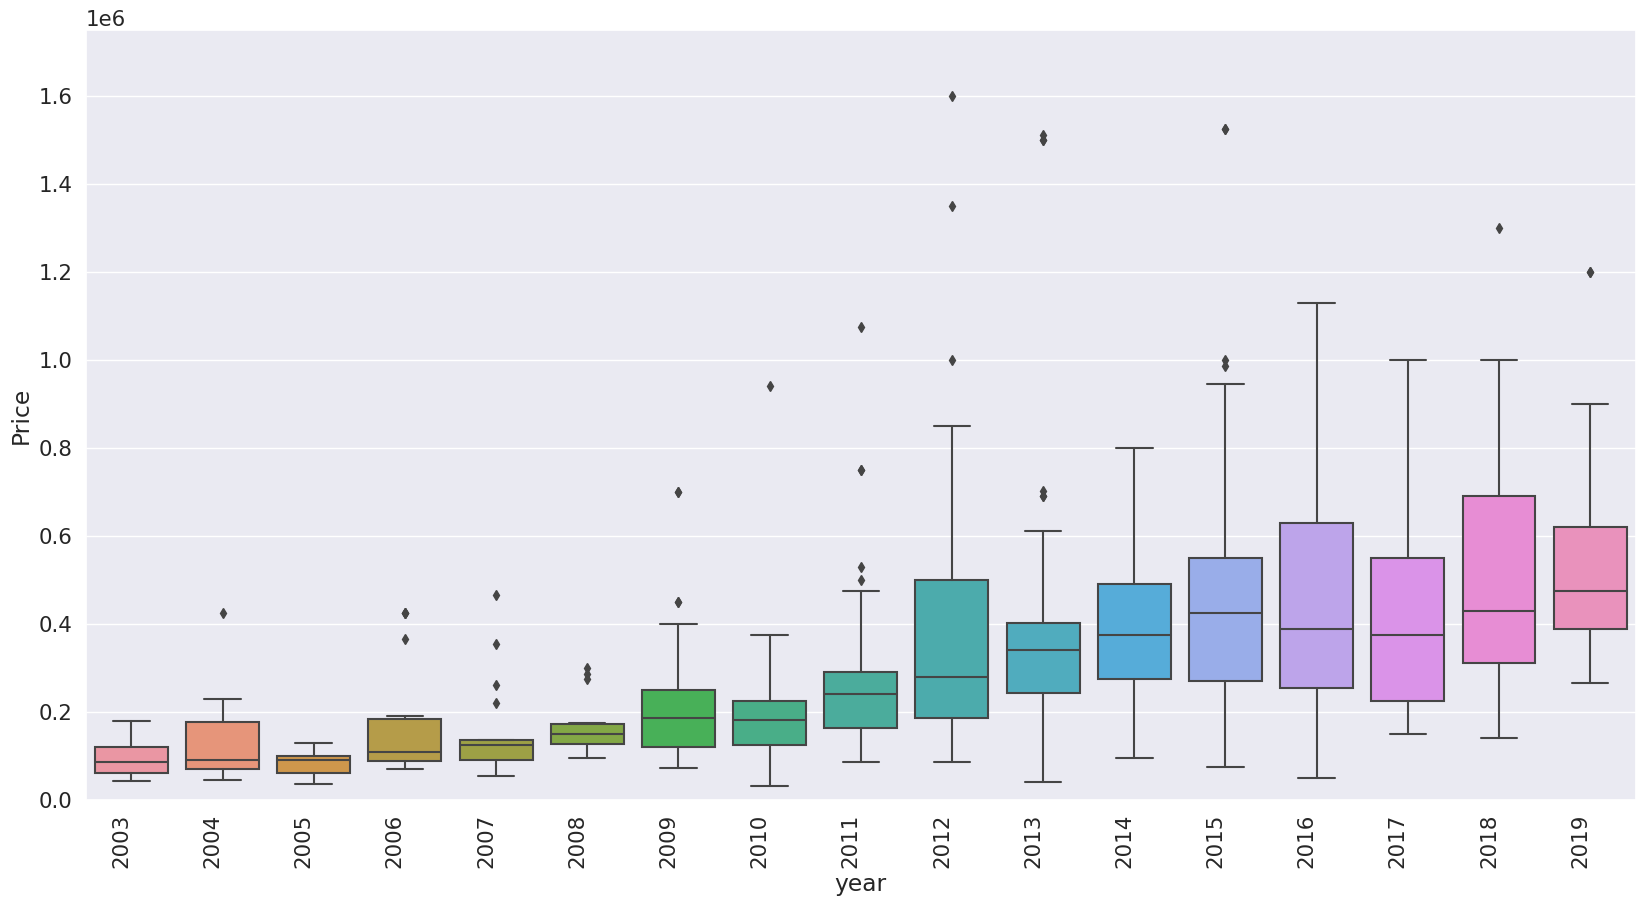

In [ ]:
plt.subplots(figsize=(20,10))
ax=sns.boxplot(x='year',y='Price',data=df)
ax.set(ylim=(0,1750000))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha='right')
plt.show()

In [ ]:
df.reset_index(inplace=True)
# reset index column and deleting the first column(Original Index Column)
df = df.iloc[:, 1:]
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
736,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
737,Tata Indica V2,Tata,2009,110000,30000,Diesel
738,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
739,Tata Zest XM,Tata,2018,260000,27000,Diesel


### Checking Relationship of Kiliometer_Usage VS Price

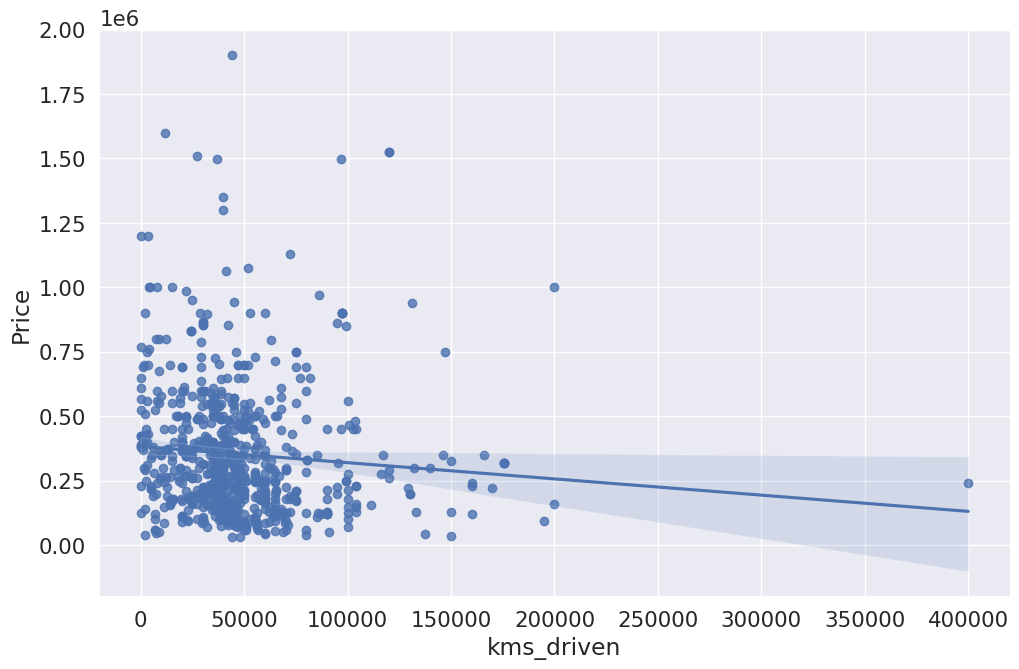

In [ ]:
# sns.relplot(x='kms_driven',y='Price',data=df,height=7,aspect=1.5)
sns.lmplot(x='kms_driven',y='Price',data=df,height=7,aspect=1.5)

### Checking Relationship of Fuel Type vs Price

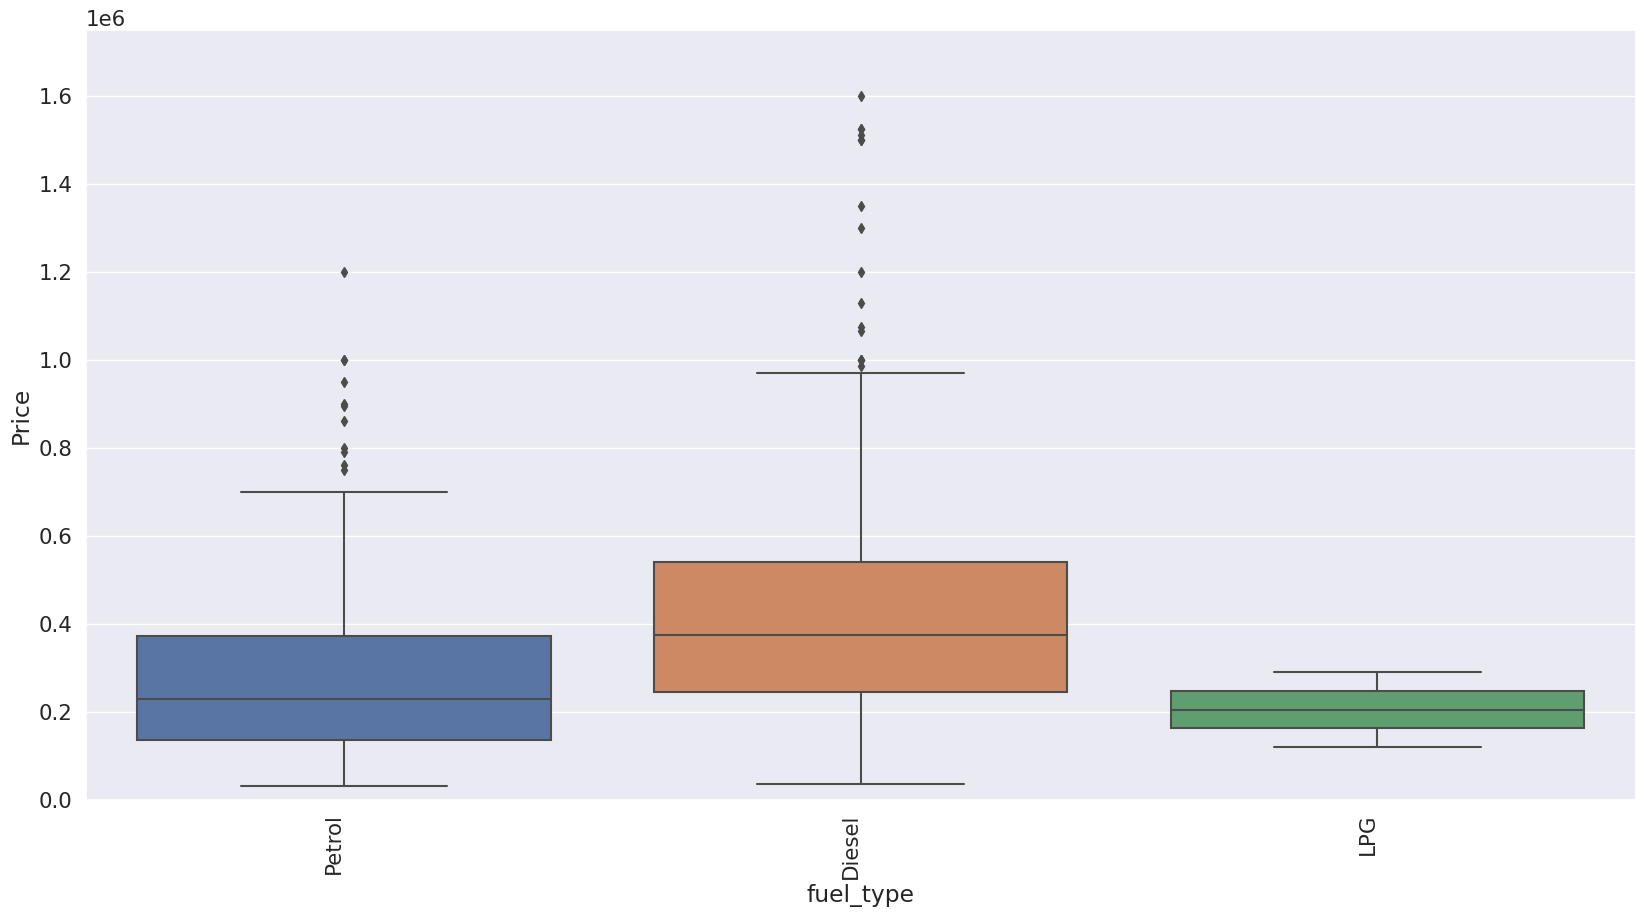

In [ ]:
plt.subplots(figsize=(20,10))
ax=sns.boxplot(x='fuel_type',y='Price',data=df)
ax.set(ylim=(0,1750000))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha='right')
plt.show()

In [ ]:
column_names_list = df.columns.tolist()
column_names_list

['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type']

In [ ]:
# delete_list = column_names_list[:3]
# delete_list

In [ ]:
# df = exe.data_preprocess.drop_columns(df, delete_list)

In [ ]:
print(df.shape)
df

(741, 6)


,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
736,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
737,Tata Indica V2,Tata,2009,110000,30000,Diesel
738,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
739,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [ ]:
%pwd

'/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/Project01-Car Price Predictor/result'

In [ ]:
df.to_csv('Car_Munging_Data.csv')

## Data Extraction

In [ ]:
df.shape
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        741 non-null    object
 1   company     741 non-null    object
 2   year        741 non-null    int64 
 3   Price       741 non-null    int64 
 4   kms_driven  741 non-null    int64 
 5   fuel_type   741 non-null    object
dtypes: int64(3), object(3)
memory usage: 34.9+ KB


In [ ]:
target_variable = 'Price'

X,y = exe.sep(df,target_variable)

In [ ]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
736,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
737,Tata Indica V2,Tata,2009,30000,Diesel
738,Toyota Corolla Altis,Toyota,2009,132000,Petrol
739,Tata Zest XM,Tata,2018,27000,Diesel


In [ ]:
X_train,X_test,y_train,y_test = exe.sep_split(df,target_variable,test_size=0.1,random_state=555)

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(666, 5) (75, 5)
(666,) (75,)


In [ ]:
num_col = [col for col in X_train.columns if X_train[col].dtypes!='O']
num_col

['year', 'kms_driven']

In [ ]:
cat_col = [col for col in X_train.columns if X_train[col].dtypes=='O']
cat_col

['name', 'company', 'fuel_type']

In [ ]:
num_col = ['year','kms_driven']
cat_col = ['name', 'company','fuel_type']

In [ ]:
num_feature = exe.column_identify(df,num_col)
cat_feature = exe.column_identify(df,cat_col)

In [ ]:
print(num_feature)
print(cat_feature)

{'year': 17, 'kms_driven': 226}
{'name': 217, 'company': 12, 'fuel_type': 3}


In [ ]:
# distinguish each feature into different categories which will perform column transform
numeric_features = []
categorical_features = ['name','company','fuel_type']
passthrough_features = ['year','kms_driven']
drop_features = []

In [ ]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [ ]:
ohe.categories_

[array(['Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0', 'Audi A8',
        'Audi Q3 2.0', 'Audi Q7', 'Chevrolet Beat',
        'Chevrolet Beat Diesel', 'Chevrolet Beat LS', 'Chevrolet Beat LT',
        'Chevrolet Beat PS', 'Chevrolet Cruze LTZ', 'Chevrolet Enjoy',
        'Chevrolet Enjoy 1.4', 'Chevrolet Sail 1.2', 'Chevrolet Sail UVA',
        'Chevrolet Spark', 'Chevrolet Spark 1.0', 'Chevrolet Spark LS',
        'Chevrolet Spark LT', 'Chevrolet Tavera LS',
        'Chevrolet Tavera Neo', 'Ford EcoSport', 'Ford EcoSport Ambiente',
        'Ford EcoSport Titanium', 'Ford EcoSport Trend', 'Ford Fiesta',
        'Ford Fiesta SXi', 'Ford Figo', 'Ford Figo Diesel',
        'Ford Figo Duratorq', 'Ford Figo Petrol', 'Ford Fusion 1.4',
        'Ford Ikon 1.3', 'Ford Ikon 1.6', 'Honda Accord', 'Honda Amaze',
        'Honda Amaze 1.2', 'Honda Amaze 1.5', 'Honda Brio', 'Honda Brio V',
        'Honda Brio VX', 'Honda City', 'Honda City 1.5', 'Honda City SV',
        'Honda City VX', 'Honda City ZX

In [ ]:
column_transformation=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                           remainder='passthrough')

In [ ]:
column_transformation

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories=[array(['Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0', 'Audi A8',
       'Audi Q3 2.0', 'Audi Q7', 'Chevrolet Beat',
       'Chevrolet Beat Diesel', 'Chevrolet Beat LS', 'Chevrolet Beat LT',
       'Chevrolet Beat PS', 'Chevrolet Cruze LTZ', 'Chevrolet Enjoy',
       'Chevrolet Enjoy 1.4', 'Chevrolet Sail 1.2', 'Chevrolet...
       'Volkswagen Polo Highline1.2L', 'Volkswagen Polo Trendline',
       'Volkswagen Vento Comfortline', 'Volkswagen Vento Highline',
       'Volkswagen Vento Konekt'], dtype=object),
                                                           array(['Audi', 'Chevrolet', 'Ford', 'Honda', 'Hyundai', 'Mahindra',
       'Maruti', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen'],
      dtype=object),
                                                           array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                 ['name', 'company', 'fuel_type'])])

In [ ]:
model=LinearRegression()

In [ ]:
pipe=make_pipeline(column_transformation,model)

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0', 'Audi A8',
       'Audi Q3 2.0', 'Audi Q7', 'Chevrolet Beat',
       'Chevrolet Beat Diesel', 'Chevrolet Beat LS', 'Chevrolet Beat LT',
       'Chevrolet Beat PS', 'Chevrolet Cruze LTZ', 'Chevrolet Enjoy',
       'Chevrolet En...
       'Volkswagen Vento Comfortline', 'Volkswagen Vento Highline',
       'Volkswagen Vento Konekt'], dtype=object),
                                                                            array(['Audi', 'Chevrolet', 'Ford', 'Honda', 'Hyundai', 'Mahindra',
       'Maruti', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [ ]:
y_pred=pipe.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

0.7668656807080854

In [ ]:
# test_size, random_state = exe.sample_comparsion(X, y, column_transformation, model)

In [ ]:
# test_size

In [ ]:
# random_state

In [ ]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([424939.54761253])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.13,random_state=14)
lr=LinearRegression()
pipe=make_pipeline(column_transformation,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8477801476657362

In [ ]:
%pwd

'/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/Project01-Car Price Predictor/result'

In [ ]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [ ]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([435873.22422507])

In [ ]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0', 'Audi A8',
       'Audi Q3 2.0', 'Audi Q7', 'Chevrolet Beat',
       'Chevrolet Beat Diesel', 'Chevrolet Beat LS', 'Chevrolet Beat LT',
       'Chevrolet Beat PS', 'Chevrolet Cruze LTZ', 'Chevrolet Enjoy',
       'Chevrolet Enjoy 1.4', 'Chevrolet Sail 1.2', 'Chevrolet Sail UVA',
       'Chevrolet Spark', 'Chevrolet Spark 1.0', 'Chevrolet Spark LS',
       'Chevrolet Spark LT', 'Chevrolet Tavera LS',
       'Chevrolet Tavera Neo', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend', 'Ford Fiesta',
       'Ford Fiesta SXi', 'Ford Figo', 'Ford Figo Diesel',
       'Ford Figo Duratorq', 'Ford Figo Petrol', 'Ford Fusion 1.4',
       'Ford Ikon 1.3', 'Ford Ikon 1.6', 'Honda Accord', 'Honda Amaze',
       'Honda Amaze 1.2', 'Honda Amaze 1.5', 'Honda Brio', 'Honda Brio V',
       'Honda Brio VX', 'Honda City', 'Honda City 1.5', 'Honda City SV',
       'Honda City VX', 'Honda City ZX', 'Honda Jazz 

In [ ]:
sklearn.__version__

'1.2.2'